### Importing neede libraries

In [2]:
import random
from matplotlib import pyplot as plt
import numpy as np
import itertools

Now I set global variables.\
in 'towns' I keep the location of all towns.\
In 'weights' I keep the random points i make.\
min_x is the minimum x of all towns.\
min_y is the minimum y of all towns.\
max_x is the maximum x of all towns.\
max_y is the maximum y of all towns.

In [3]:
towns = []
weights = []
min_x = 1000
max_x = -1000
min_y = 1000
max_y = -1000
alpha = 0.5

In input_read function I fill 'towns' array and also find the value of the four global variables mentioned above.

In [4]:
def input_read(file_name):
    global towns
    global min_x
    global min_y
    global max_x
    global max_y
    
    file = open(file_name)
    input_raw = file.read()
    file.close()
    
    help_arr = []
    input_mat = input_raw.split('\n')
    for i in range(len(input_mat)-1):
        x = input_mat[i].split()
        help_arr.append(float(x[1]))
        help_arr.append(float(x[2]))
        
        if help_arr[0] < min_x:
            min_x = help_arr[0]
            
        if help_arr[0] > max_x:
            max_x  = help_arr[0]
            
        if help_arr[1] < min_y:
            min_y = help_arr[1]
            
        if help_arr[1] > max_y:
            max_y = help_arr[1]
            
        towns.append(help_arr)
        help_arr = []

Show_plt function is for plotting towns and predictiones.

In [5]:
def show_plt():
    w2 = np.array(weights)
    c2 = np.array(towns)
    plt.scatter(c2[:,0], c2[:,1], facecolors='none', edgecolors='r')
    plt.scatter(w2[:,0], w2[:,1], facecolors='none', edgecolors='b')
    plt.show()

In random_weight_initializer i initialize the weights with random values so that i can start processing my SOM.

In [6]:
def random_weight_initializer(number_of_towns):
    global weights
#     print(min_x)
#     print(min_y)
#     print(max_x)
#     print(max_y)
    w = []
    for i in range(number_of_towns):
        x = random.uniform(min_x, max_x)
        y = random.uniform(min_y, max_y)
        w.append(x)
        w.append(y)
        weights.append(w)
        w = []

I needed merge sort to **find the neighbors** of a point so i wrote this function.\
Using merge sort, I sort the points based on their distance from one single point.

In [7]:
def mergeSort(arr1):
    if len(arr1) > 1:

        mid = len(arr1)//2

        L = arr1[:mid]
#         L2 = arr2[:mid]

        R = arr1[mid:]
#         R2 = arr2[mid:]

        mergeSort(L)

        mergeSort(R)
  
        i = j = k = 0

        while i < len(L) and j < len(R):
            if L[i] < R[j]:
                arr1[k] = L[i]
#                 arr2[k] = L2[i]
                i += 1
            else:
                arr1[k] = R[j]
#                 arr2[k] = R2[j]
                j += 1
            k += 1

        while i < len(L):
            arr1[k] = L[i]
#             arr2[k] = L2[i]
            i += 1
            k += 1
  
        while j < len(R):
            arr1[k] = R[j]
#             arr2[k] = R2[j]
            j += 1
            k += 1

Bellow function **find the distance** between two points.\
I called this function in 'neighbor_finder' and 'city_nearest' and 'delete_duplicate' and 'cluster' and 'find_best'functions.

In [8]:
def distance_calc(w1, w2):
#     print(w1)
#     print(w2)
    x_d = (w1[0]-w2[0])**2
    y_d = (w1[1]-w2[1])**2
    f = (x_d + y_d)**(1/2)
    return f

As it is clear from the name of this function, it's job is to **find n neighbors** for a given point based on their distance from the mentioned point.

In [9]:
def neighbor_finder(n, w):
    dif = []
    neighbor_arr = []
#     print("weights:", end=" ")
#     print(weights)
    for i in range(len(weights)):
#         print("i :", end=" ")
#         print(i)
        h = distance_calc(w, weights[i])
        dif .append(h)
#     print(dif)
    dif2 = dif[:]
    mergeSort(dif)
#     print(dif)
    max_dist = dif[n]
#     print(max_dist)
    for i in range(len(dif2)):
        if(dif2[i] <= max_dist and dif2[i]!=0):
            neighbor_arr.append(i)
    return neighbor_arr

**'city_nearest'** will find the **nearest point**(from weights array) from a given city.\
I use this funtion followed by neighbor_finder, to update the nearest point and its neighbors in SOM.

In [10]:
def city_nearest(city):
    dist = distance_calc(city, weights[0])
    nearest_index = 0
#     print(dist)
    for i in range(1,len(weights)):
        d2 = distance_calc(city, weights[i])

        if d2 < dist :
            dist = d2
            nearest_index = i
    return nearest_index

I call 'w_update' in all iterations to fit the random points on towns.

In [11]:
def w_update(city, neighbors_index):
    global weights
    global alpha
    
    for i in neighbors_index:
        weights[i][0] = weights[i][0] + (alpha* (city[0] - weights[i][0]))
        weights[i][1] = weights[i][1] + (alpha* (city[1] - weights[i][1]))

'initialize2' initializes the weights, but not completely randomly.\
I coded this just to check if it will helps me find a better solution.

In [12]:
def initializer2(n):
    global min_x
    global min_y
    global max_x
    global max_y
    x_d = (max_x - min_x)//n
    y_d = (max_y - min_y)//n
    w=[]
    
    x = max_x
    y = min_y
    w.append(x)
    w.append(y)
    weights.append(w)
    
    w2= []
    x = min_x
    y = max_y
    w2.append(x)
    w2.append(y)
#     weights.append(w)
    
    w=[]
    for i in range(n-2):
        x = random.randint(min_x, min_x+x_d)
        y = random.randint(min_y, min_y+x_d)
        w.append(x)
        w.append(y)
        weights.append(w)
        w = []
        min_x +=  x_d
        min_y += y_d
    weights.append(w2)

#### Main function:
main function is where I **gathered** and called all function inorder.

In [13]:
def main(input_file, weights_num):
    global alpha
    global towns
    global weights
    global min_x
    global min_y
    global max_x
    global max_y
    
    towns = []
    weights = []
    min_x = 1000
    max_x = -1000
    min_y = 1000
    max_y = -1000
    
    neighbor_num = 1
    
#     print("1")
    
    input_read(input_file)
    random_weight_initializer(weights_num)
#     initializer2(weights_num)
    show_plt()
#     print(towns)
#     print("2")
    
    x = 0
    
    for j in range(100):
    
        for i in towns:
            
            nearest_index = city_nearest(i)

            neighbors = neighbor_finder(neighbor_num, weights[nearest_index])

            w_update(i, neighbors)

    
        alpha *= 0.9
#         print("3")

        if(neighbor_num >1 ):
            neighbor_num -= 1
            
            
        x += 1
        if(x%70==0):
            print(x)
            show_plt()
    show_plt()

## First testcase:

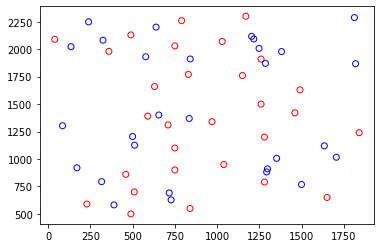

1000


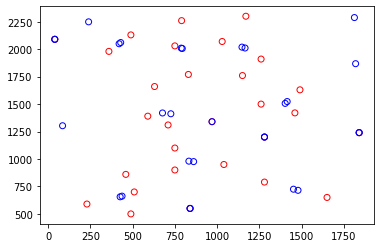

2000


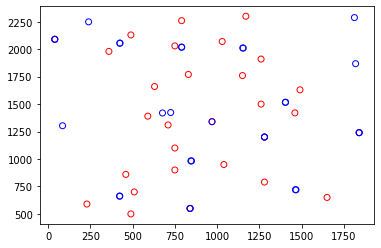

3000


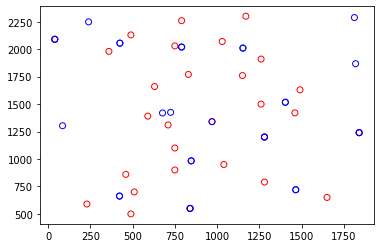

4000


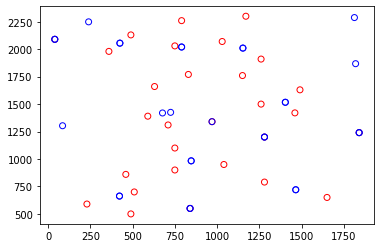

5000


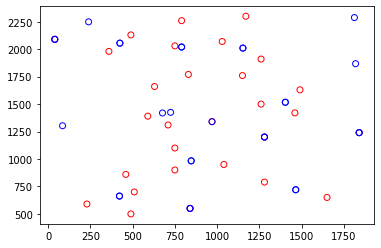

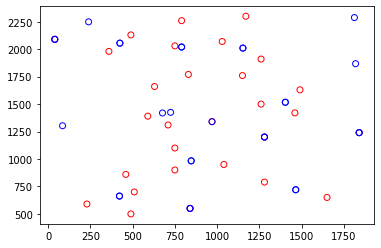

4.4902645115227424e-05


In [12]:
alpha = 0.999
main('1.tsp',29)
print(alpha)

As you can see, this approach **doesn't end up in desired results**.\
We need to change our algrithm a little bit.

#### New approach:
I'll **cluster all points** using SOM, then I'll find the best path in each cluster(By **checking all permutations** of the points of that cluster) and finally I **connect the starting and ending points** of different clusters to each other.

###### Clustering step:

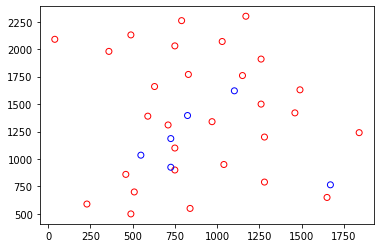

70


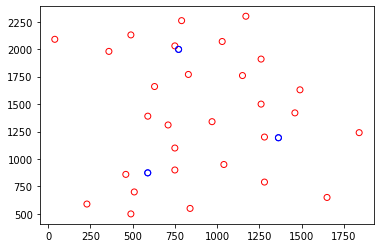

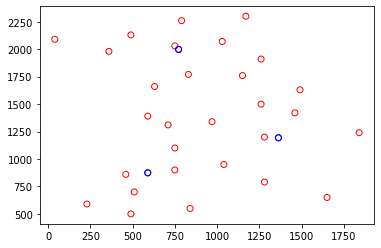

In [18]:
alpha = 0.9
main('1.tsp',6)

I randomly generated 6 points and after SOM, as you can see, some of them overlaped.\
Using **'delete_duplicate'** function I delete overlaping points.

In [16]:
def delete_duplicate():
    rem = []
    for i in range(len(weights)-1):
        for j in range(i+1, len(weights)):
            if distance_calc(weights[i],weights[j]) < 20:
                rem.append(weights[i])
    for i in range(len(rem)):
        weights.remove(rem[i])
    show_plt()

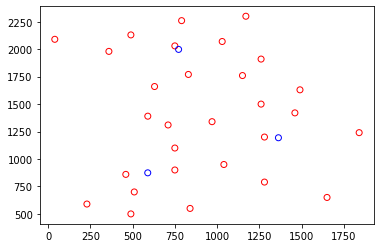

In [20]:
delete_duplicate()

In [21]:
weights

[[1362.59092166782, 1193.5487167844735],
 [589.6937500843626, 874.1733805288363],
 [772.1844029221096, 1998.08735525833]]

Now it's time to find out which towns goes to which clusters.\
I do this using cluster function which,based on eahch points distance, finds what I want.

In [17]:
def cluster():
    clusters = []
    for i in range(len(weights)):
        clusters.append([])
    min_dist = 10000
    min_index = 0
    for i in range(len(towns)):
        min_dist = 10000
        min_index = 0
        for j in range(len(weights)):
            if (distance_calc(towns[i],weights[j])<min_dist and len(clusters[j]) < 10 ):
                min_dist = distance_calc(towns[i],weights[j])
                min_index = j
        clusters[min_index].append(towns[i])
    return clusters

**plotting clusters:**

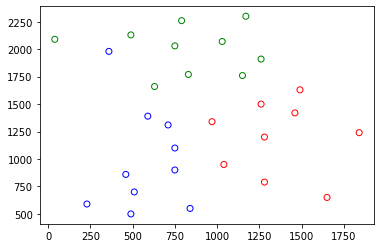

In [24]:
cl = cluster()
w2 = []

colors = itertools.cycle(["r", "b", "g"])
for i in cl:
    w2 = np.array(i)
    plt.scatter(w2[:,0], w2[:,1], facecolors='none', edgecolors=next(colors))
plt.show()

As i mentioned before, I'm trying to find the best path in each cluster by finding all permutationes of the points related to that cluster.\
'find_best' function will do the job for me!

In [18]:
def find_best(arr):
    all_permutes = list(itertools.permutations(arr))
    cost_arr = []
    cost = 0
    for p in all_permutes:
        for i in range(len(p)-1):
            cost += distance_calc(p[i],p[i+1])
        cost_arr.append(cost)
        cost = 0
    min_index = cost_arr.index(min(cost_arr))
    return all_permutes[min_index]
        

In [34]:
for i in cl:
    print(i)

[[1650.0, 650.0], [1490.0, 1630.0], [970.0, 1340.0], [1280.0, 1200.0], [1040.0, 950.0], [1840.0, 1240.0], [1260.0, 1500.0], [1280.0, 790.0], [1460.0, 1420.0]]
[[750.0, 1100.0], [710.0, 1310.0], [840.0, 550.0], [510.0, 700.0], [750.0, 900.0], [230.0, 590.0], [460.0, 860.0], [590.0, 1390.0], [490.0, 500.0], [360.0, 1980.0]]
[[1150.0, 1760.0], [630.0, 1660.0], [40.0, 2090.0], [750.0, 2030.0], [1030.0, 2070.0], [790.0, 2260.0], [1170.0, 2300.0], [830.0, 1770.0], [490.0, 2130.0], [1260.0, 1910.0]]


In [50]:
best_permutes = []
for i in cl:
    best_permutes.append(find_best(i))

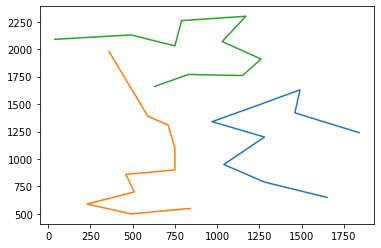

In [53]:
for i in best_permutes:
    w2 = np.array(i)
    plt.plot(w2[:,0], w2[:,1])
plt.show()

In [57]:
path = []
for k in best_permutes:
    for l in k:
        path.append(l)
path.append(path[0])

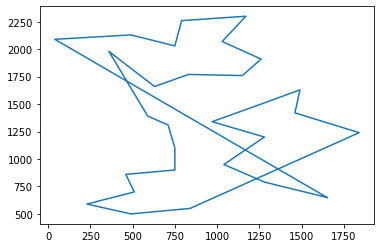

In [58]:
p = np.array(path)
plt.plot(p[:,0], p[:,1])
plt.show()

In [60]:
test_one_cost = 0
for i in range(len(path)-1):
    test_one_cost+= distance_calc(path[i], path[i+1])
print(test_one_cost)

11603.31443081355


#### Test two:

**Initializing random points**

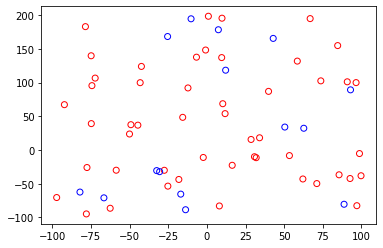

70


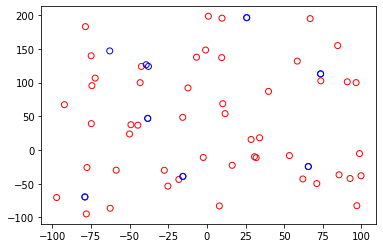

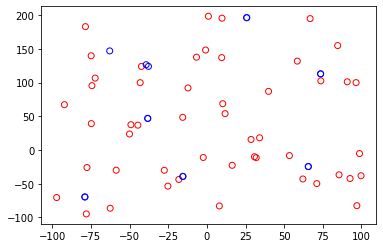

In [83]:
alpha = 0.9
main('2.tsp',15)

**Deleting overlapping points**

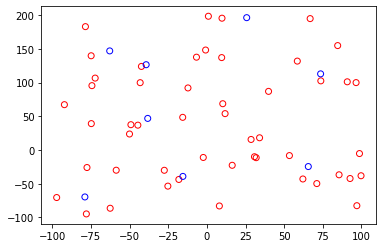

In [84]:
delete_duplicate()

**Finding the cluster of each town**

In [87]:
cl2 = cluster()
for i in cl2:
    print(i)

[[-50.0, 23.8], [11.8, 54.0], [10.3, 68.7], [-49.1, 37.6], [-74.7, 39.2], [-92.1, 67.3], [-44.6, 36.9], [-15.6, 48.5]]
[[-72.2, 106.7], [-43.1, 99.9], [-42.3, 124.0], [-0.8, 148.3], [-12.2, 92.1], [-6.7, 137.7], [9.6, 137.1], [-74.3, 95.5]]
[[-77.9, -94.7], [-97.1, -70.4], [-77.5, -25.9], [-62.5, -86.3]]
[[-74.8, 139.8], [-78.5, 183.0]]
[[9.8, 195.5], [1.0, 198.4], [66.8, 194.9]]
[[-58.6, -29.9], [16.4, -22.6], [-18.1, -43.6], [8.1, -82.9], [-2.3, -11.0], [-25.2, -53.5], [-27.5, -30.0], [62.1, -42.9], [31.9, -11.3]]
[[73.7, 102.6], [96.5, 100.0], [84.6, 154.9], [90.8, 101.2], [39.9, 87.0], [58.5, 131.9]]
[[53.4, -8.2], [34.1, 18.2], [97.0, -82.5], [30.8, -9.9], [71.1, -49.7], [28.6, 15.7], [92.6, -42.2], [85.5, -36.7], [98.7, -5.2], [99.7, -38.1]]


**finding best permutations in each cluster**

In [90]:
best_permutes_test2 = []
for i in cl2:
    best_permutes_test2.append(find_best(i))

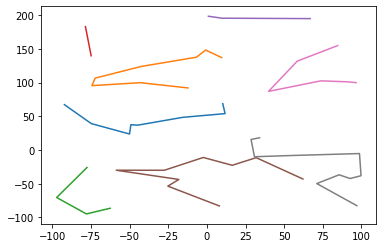

In [91]:
wt2 = []
for i in best_permutes_test2:
    wt2 = np.array(i)
    plt.plot(wt2[:,0], wt2[:,1])
plt.show()

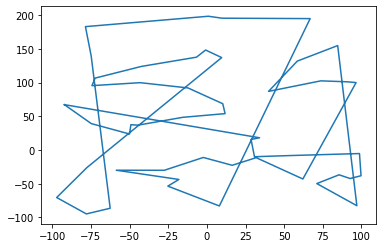

In [92]:
path2 = []
for k in best_permutes_test2:
    for l in k:
        path2.append(l)
path2.append(path2[0])
p2 = np.array(path2)
plt.plot(p2[:,0], p2[:,1])
plt.show()

#### Test 3:

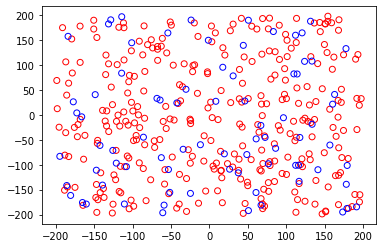

70


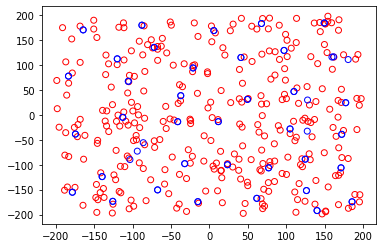

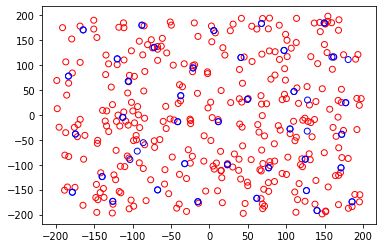

In [29]:
alpha = 0.9
main('3.tsp',80)

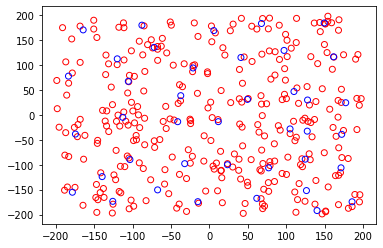

In [30]:
delete_duplicate()

In [31]:
cl3 = cluster()

best_permutes_test3 = []
for i in cl3:
    best_permutes_test3.append(find_best(i))

NameError: name 'best_permutes_test2' is not defined

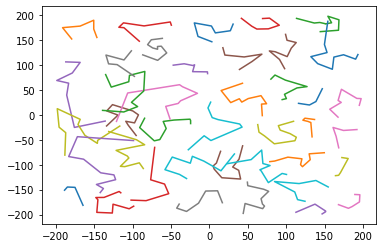

In [32]:
wt3 = []
for i in best_permutes_test3:
    wt3 = np.array(i)
    plt.plot(wt3[:,0], wt3[:,1])
plt.show()

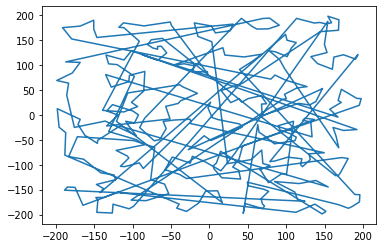

In [33]:
path3 = []
for k in best_permutes_test3:
    for l in k:
        path3.append(l)
path3.append(path3[0])
p3 = np.array(path3)
plt.plot(p3[:,0], p3[:,1])
plt.show()